# Практическая работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 0382 Прибылов Никита и Морева Елена. Вариант №15.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов. 

## Основные теоретические положения

Нерекурсивный фильтр - линейный фильтр, характерной особенностью которого является ограниченность по времени его импульсной характеристики (с какого-то момента времени его выходной сигнал становится точно равным нулю).

Передаточная функция $H(\omega)$ - оператор, выражающий связь между входным сигналом и выходным.<br>Передаточные функции линейного процесса сглаживания показывают для каждого $\omega$ соответствующее собственное значение процесса в диапазоне вплоть до частоты Найквиста

Метод наименьших квадратов - математический метод для оценки параметров моделей:
$$\sum^{m}_{j=1}(y_m-f(x_j))^2 \Rightarrow min$$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов. 

## Выполнение работы

Инициализация начальных значений:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Вспомогательная функция отрисовки графиков:

In [119]:
def plot(x, Y, legend=None, title='', xlabel='', ylabel='', size=(15, 10)):
    plt.figure(figsize=size)
    if legend is None:
        legend = ('',)*len(Y)
        print(legend)
    for y, label in zip(Y, legend):
        plt.plot(x, y, label=label)
    plt.legend()
    plt.grid()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

**Задание 1**

Были выведены формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построены графики $\tilde H(f)$.

Построим приближение (в смысле МНК) прямой линией по пяти точкам:
$$F(A,B)=\sum^{2}_{k=-2}(s_k-y_k)^2=\sum^{2}_{k=-2}(s_k-A-Bk)^2 \Rightarrow min$$

Берём частные производные по $A$ и $B$, получим систему нормальных уравнений:
$$\begin{cases}5A+0B=\sum^{k=2}_{k=-2}s_k\\0A+10B=\sum^{k=2}_{k=-2}ks_k\end{cases}$$

Решаем систему:
$$y_0=A=\frac{1}{5}\sum_{k=-2}^{k=2}s_k=\frac{1}{5}(s_{-2}+s_{-1}+s_0+s_1+s_2)$$

Или в общем случае:
$$y_n=\frac{1}{5}\sum_{k=n-2}^{k=n+2}s_k=\frac{1}{5}(s_{n-2}+s_{n-1}+s_n+s_{n+1}+s_{n+2})$$

Примем $s_n=e^{i\omega n}$:
$$y_n=\frac{1}{5}(e^{-2i\omega}+e^{-i\omega}+1+e^{i\omega}+e^{2i\omega})e^{i\omega n}=H(\omega)e^{i\omega n}$$

Получаем передаточную функцию $H(\omega)$:
$$H(\omega)=\frac{1}{5}(e^{-2i\omega}+e^{-i\omega}+1+e^{i\omega}+e^{2i\omega})$$

Так как полученная передаточная функция - геометрическая прогрессия со знаменателем $e^{i \omega}$, можем представить её как сумму геометрической прогресии:
$$H(\omega)=\frac{e^{i\frac{5\omega}{2}}-e^{-i\frac{5\omega}{2}}}{5(e^{i\frac{\omega}{2}}-e^{-i\frac{\omega}{2}})}$$

Применим формулу Эйлера:
$$H(\omega)=\frac{sin(\frac{5\omega}{2})}{5sin(\frac{\omega}{2})}$$

$H(\omega)=H(2\pi f)=\tilde H(f)$, так как $H(\omega)$ - периодическая функция с периодом равным $2\pi$.  

В общем случае, при приближениии по $2m+1$ точкам - формула принимает вид:
$$H(\omega)=\frac{sin(\frac{(2m+1)\omega}{2})}{(2m+1)sin(\frac{\omega}{2})}$$ 



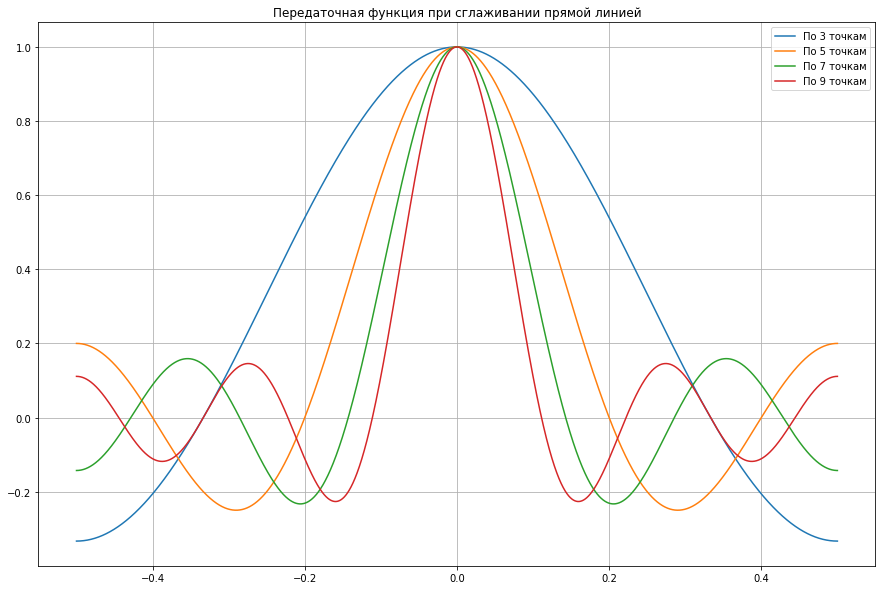

In [144]:
H1 = lambda f, m: np.sin((2*m+1) * (np.pi*f)) / ((2*m+1) * np.sin(np.pi*f))

X = np.linspace(-0.5, 0.5, 10000)
Y1 = H1(X,1), H1(X,2), H1(X,3), H1(X,4)
legend = 'По 3 точкам', 'По 5 точкам', 'По 7 точкам', 'По 9 точкам'

plot(X, Y1, legend, title='Передаточная функция при сглаживании прямой линией')


Графики симметричны относительно нуля; при увеличении количества точек колебания учащаются при отдалении от нуля, амплитуда колебаний падает.

**Задание 2**

Были выведены формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построены графики $\tilde H(f)$.

При сглаживании полиномом второй степени $y(t)=A+Bt+Ct^2$, приближение по семи точкам:

$$F(A,B,C)=\sum^{3}_{k=-3}(s_k-y_k)^2=\sum^{3}_{k=-3}(s_k-A-Bk-Ck^2)^2 \Rightarrow min$$

Необходимо найти коэффициенты A, B и C:

$$\begin{cases}
7A + 0B + 10C = \sum^{k=3}_{k=-3}s_k \\
0A + 28B + 0C = \sum^{k=3}_{k=-3}ks_k \\
28A + 0B + 196C = \sum^{k=3}_{k=-3}k^2s_k
\end{cases}$$

Решаем систему и получаем:

$$y_n=\frac{1}{21}(-2s_{n-3}+3s_{n-2}+6s_{n-1}+7s_{n}+6s_{n+1}+3s_{n+2}-2s_{n+3})$$

Примем $s_n=e^{i\omega n}$, получаем передаточную функцию:

$$H(\omega)=\frac{1}{21}[7+12cos(\omega)+6cos(2\omega)-4cos(3\omega)]$$

Передаточные функции для 9, 11 и 13 точек находятся аналогично:

Для 9-ти точек:

$$y_n = \frac{1}{231}(-21s_{n-4}+14s_{n-3}+39s_{n-2}+54s_{n-1}+59s_{n}+54s_{n+1}+39s_{n+2}+14s_{n+3}-21s_{n+4})$$

$$H(\omega)=\frac{1}{231}[59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega)]$$

Для 11-ти точек:

$$y_n=\frac{1}{429}(-36s_{n-5}+9s_{n-4}+44s_{n-3}+69s_{n-2}+84s_{n-1}+89s_{n}+84s_{n+1}+69s_{n+2}+44s_{n+3}+9s_{n+4}-36s_{n+5})$$

$$H(\omega)=\frac{1}{429}[89+168cos(\omega)+138cos(2\omega)+88cos(3\omega)+18cos(4\omega)-72cos(5\omega)]$$

Для 13-ти точек:

$$y_n=\frac{1}{143}(-11s_{n-6}+9s_{n-4}+16s_{n-3}+21s_{n-2}+24s_{n-1}+25s_{n}+24s_{n+1}+21s_{n+2}+16s_{n+3}+9s_{n+4}-11s_{n+6})$$

$$H(\omega)=\frac{1}{143}[25+48cos(\omega)+42cos(2\omega)+32cos(3\omega)+18cos(4\omega)-22cos(6\omega)]$$

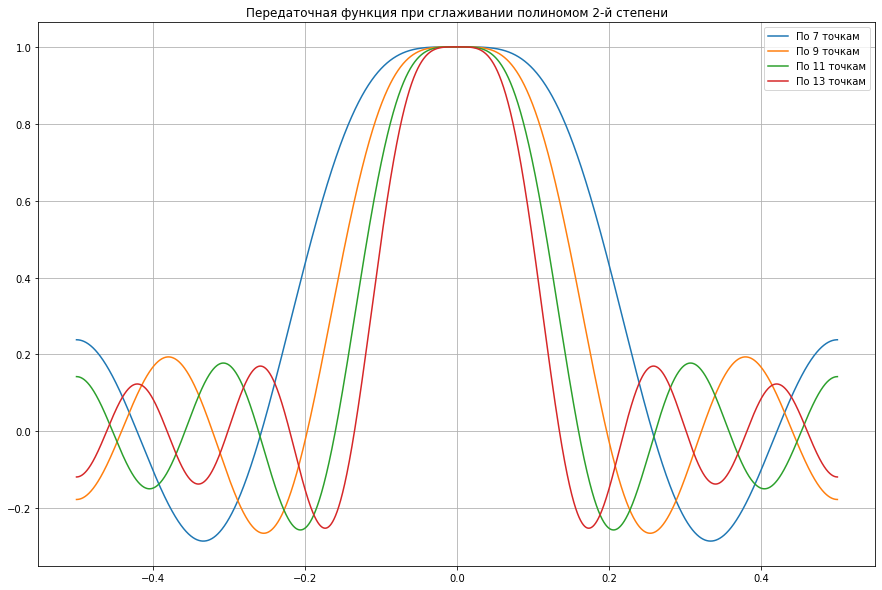

In [146]:
def H2(f, denom, coef):
    omega = 2*np.pi*f
    return 1/denom * sum([c * np.cos(i * omega) for c,i in zip(coef, range(len(coef)))])

X = np.linspace(-0.5, 0.5, 10000)
Y2 = H2(X, 21, (7, 12, 6, -4)), \
H2(X, 231, (59, 108, 78, 28, -42)), \
H2(X, 429, (89, 168, 138, 88, 18, -72)), \
H2(X, 143, (25, 48, 42, 32, 18, 0, -22))

legend = 'По 7 точкам', 'По 9 точкам', 'По 11 точкам', 'По 13 точкам'
plot(X, Y2, legend, title='Передаточная функция при сглаживании полиномом 2-й степени')


**Задание 3**

Были выведены формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построены графики $\tilde H(f)$.

При сглаживании полиномом четвертой степени $y(t)=A+Bt+Ct^2+Dt^3+Et^4$, приближение по 9-ти точкам:
$$F(A,B,C,D,E)=\sum^{7}_{k=-7}(s_k-y_k)^2=\sum^{7}_{k=-7}(s_k-A-Bk-Ck^2-Dk^3-Ek^4)^2 \Rightarrow min$$

Составим систему нормальных уравнений:
$$\begin{cases}9A + 0B + 60C + 0D + 708E = \sum^{k=4}_{k=-4}s_k \\0A + 60B + 0C + 708D + 0E = \sum^{k=4}_{k=-4}ks_k \\60A + 0B + 708C + 0D + 9780E = \sum^{k=4}_{k=-4}k^2s_k \\0A + 708B + 0C + 9780D + 0E = \sum^{k=4}_{k=-4}k^3s_k \\708A + 0B + 9780C + 0D + 144708E = \sum^{k=4}_{k=-4}k^4s_k\end{cases}$$

Решаем систему:
$$y_n=\frac{1}{429}(15s_{n-4}-55s_{n-3}+30s_{n-2}+135s_{n-1}+179s_{n}+135s_{n+1}+30s_{n+2}-55s_{n+3}+15s_{n+4})$$ 

$$H(\omega) = \frac{1}{429}\big[179 + 270cos(\omega) + 60cos(2\omega) - 110cos(3\omega) + 30cos(4\omega)\big]$$  

Передаточные функции для 11, 13 и 15 точек находятся аналогично.  

Для 11 точек:  
$$y_n=\frac{1}{429}(18s_{n-5}-45s_{n-4}-10s_{n-3}+60s_{n-2}+120s_{n-1}+143s_{n}+120s_{n+1}+60s_{n+2}-10s_{n+3}-45s_{n+4}+18s_{n+5})$$  
$$H(\omega) = \frac{1}{429}\big[143 + 240cos(\omega) + 120 cos(2\omega) - 20 cos(3\omega) - 90cos(4\omega) + 36cos(5\omega)\big]$$  

Для 13 точек:  
$$y_n=\frac{1}{2431}(110s_{n-6}-198s_{n-5}-135s_{n-4}+110s_{n-3}+390s_{n-2}+600s_{n-1}+677s_{n}+600s_{n+1}+390s_{n+2}+110s_{n+3}-135s_{n+4}-198s_{n+5}+110s_{n+6})$$   
$$H(\omega) = \frac{1}{2431}\big[677 + 1200cos(\omega) + 780cos(2\omega) + 220 cos(3\omega) - 270cos(4\omega) - 396cos(5\omega) + 220cos(6\omega)\big]$$  

Для 15 точек:  
$$y_n=\frac{1}{46189}(2145s_{n-7}-2860s_{n-6}-2937s_{n-5}-165s_{n-4}+3755s_{n-3}+7500s_{n-2}+10125s_{n-1}+11063s_{n}+10125s_{n+1}+7500s_{n+2}+3755s_{n+3}-165s_{n+4}-2937s_{n+5}-2860s_{n+6}+2145s_{n+7})$$  
$$H(\omega) = \frac{1}{46189}\big[11063 + 20250cos(\omega) + 15000cos(2\omega) + 7510cos(3\omega) - 330cos(4\omega) - 5874cos(5\omega) - 5720cos(6\omega) + 4290cos(7\omega)\big]$$   


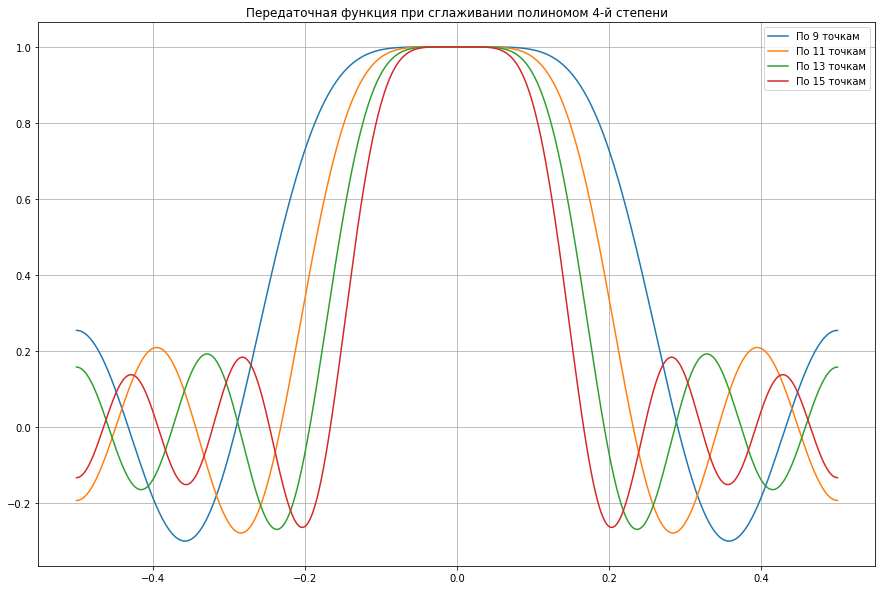

In [147]:
X = np.linspace(-0.5, 0.5, 10000)
Y3 = H2(X, 429, (179, 270, 60, -110, 30)), \
H2(X, 429, (143, 240, 120, -20, -90, 36)), \
H2(X, 2431, (677, 1200, 780, 220, -270, -396, 220)), \
H2(X, 46189, (11063, 20250, 15000, 7510, -330, -5874, -5720, 4290))

legend = 'По 9 точкам', 'По 11 точкам', 'По 13 точкам', 'По 15 точкам'
plot(X, Y3, legend, title='Передаточная функция при сглаживании полиномом 4-й степени')


**Задание 4**

Были выведены формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построены графики $\tilde H(f)$.

Формулы для передаточной функции соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам:

Для 15 точек:  
$$y_n = \frac{1}{320}(-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_{n} + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+6} - 6s_{n+6} - 3s_{n+7})$$
$$H(\omega)=\frac{1}{320}\big[74 + 134cos(\omega)+92cos(2\omega)+42cos(3\omega)+6cos(4\omega)-10cos(5\omega)-12cos(6\omega)-6cos(7\omega)\big]$$

Для 21 точек:  
$$y_n = \frac{1}{350}(-s_{n-10} - 3s_{n-9} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_{n} + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} - 5s_{n+7} - 5s_{n+8} - 3s_{n+9} -s_{n+10})$$
$$H(\omega)=\frac{1}{350}\big[60 + 114cos(\omega)+94cos(2\omega)+66cos(3\omega)+36cos(4\omega)+12cos(5\omega)-4cos(6\omega)-10cos(7\omega)-10cos(8\omega)-6cos(9\omega)-2cos(10\omega)\big]$$  


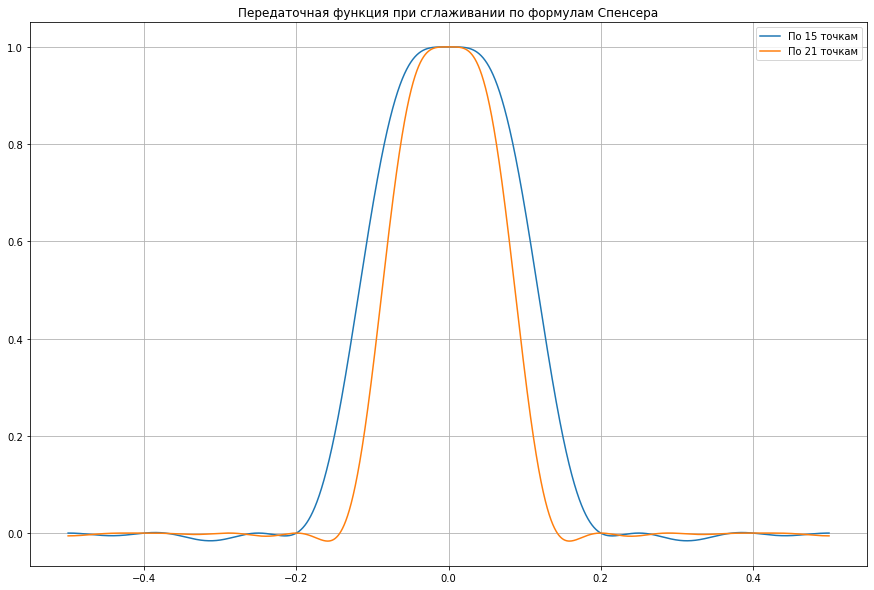

In [148]:
X = np.linspace(-0.5, 0.5, 10000)
Y4 = H2(X, 320, (74, 134, 92, 42, 6, -10, -12, -6)), \
H2(X, 350, (60, 114, 94, 66, 36, 12, -4, -10, -10, -6, -2)),

legend = 'По 15 точкам', 'По 21 точкам'
plot(X, Y4, legend, title='Передаточная функция при сглаживании по формулам Спенсера')


**Задание 5**

Построены графики из предыдущих пунктов в логарифмической шкале (Дб):

$$Дб = 20lg\Big(\frac{|y_n|}{|s_n|}\Big)$$

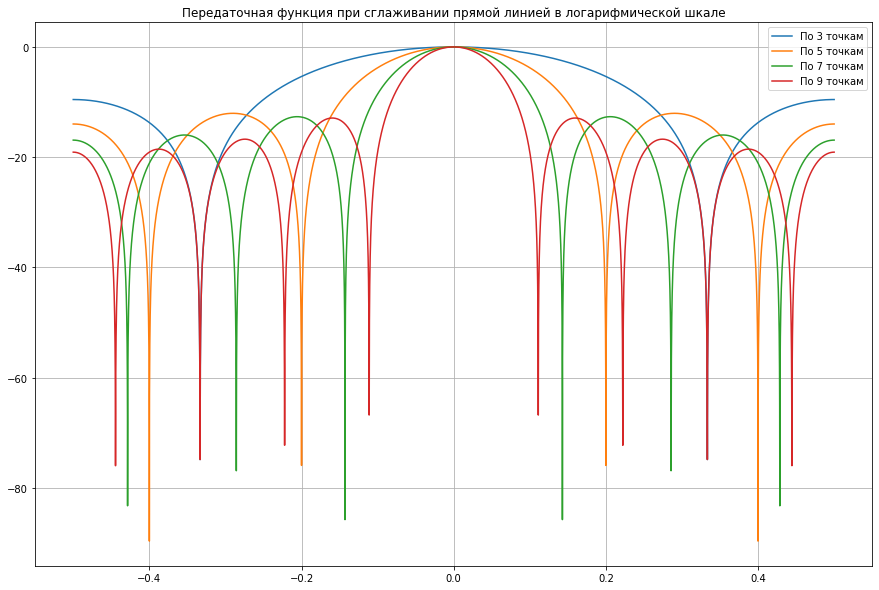

In [168]:
X = np.linspace(-0.5, 0.5, 10000)
logscale = lambda t: 20*np.log10(np.abs(t)) # логарифмирование
legend = 'По 3 точкам', 'По 5 точкам', 'По 7 точкам', 'По 9 точкам'
plot(X, logscale(Y1), legend, title='Передаточная функция при сглаживании прямой линией в логарифмической шкале')


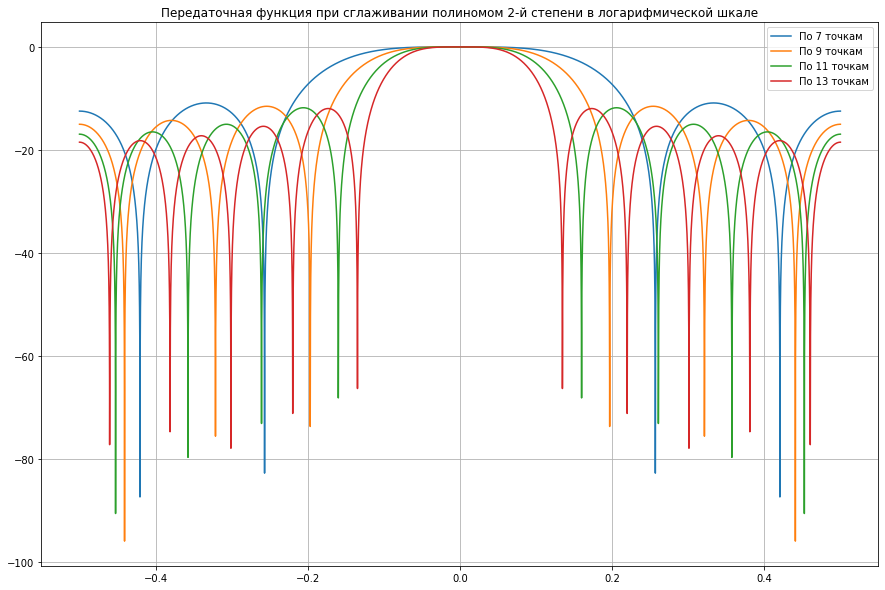

In [169]:
X = np.linspace(-0.5, 0.5, 10000)
legend = 'По 7 точкам', 'По 9 точкам', 'По 11 точкам', 'По 13 точкам'
plot(X, logscale(Y2), legend, \
     title='Передаточная функция при сглаживании полиномом 2-й степени в логарифмической шкале')


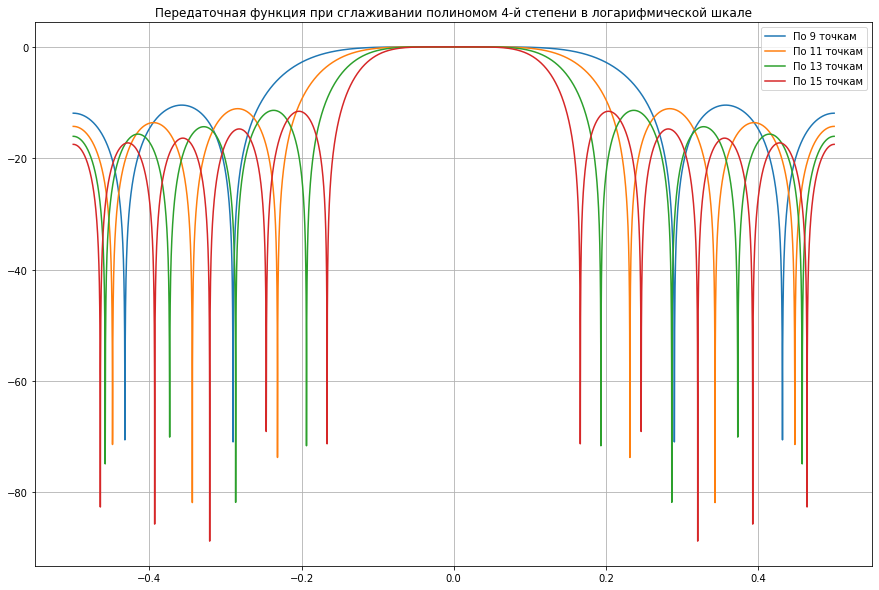

In [170]:
X = np.linspace(-0.5, 0.5, 10000)
legend = 'По 9 точкам', 'По 11 точкам', 'По 13 точкам', 'По 15 точкам'
plot(X, logscale(Y3), legend, \
     title='Передаточная функция при сглаживании полиномом 4-й степени в логарифмической шкале')


/tmp/ipykernel_16917/2271482488.py:2: RuntimeWarning: divide by zero encountered in log10
  logscale = lambda t: 20*np.log10(np.abs(t)) # логарифмирование


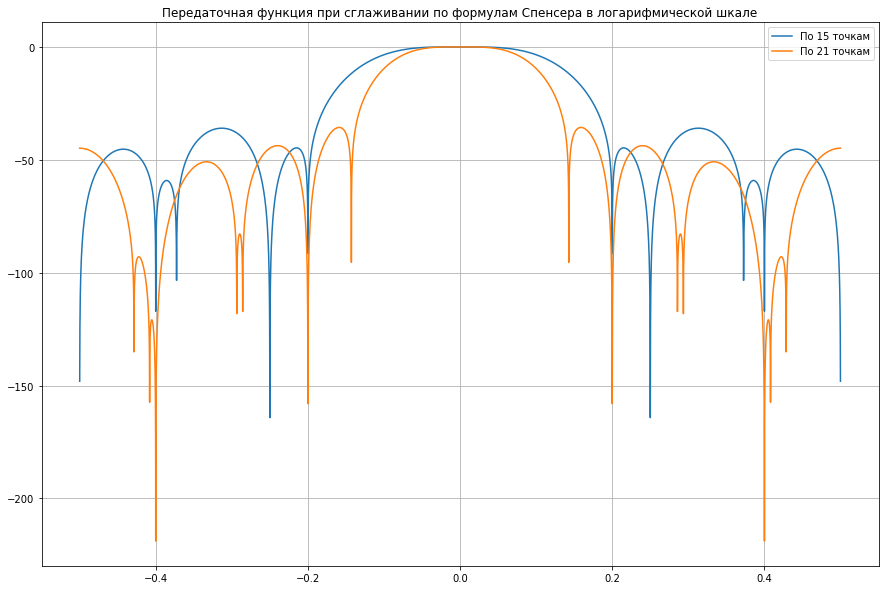

In [171]:
X = np.linspace(-0.5, 0.5, 10000)
legend = 'По 15 точкам', 'По 21 точкам'
plot(X, logscale(Y4), legend, \
     title='Передаточная функция при сглаживании по формулам Спенсера в логарифмической шкале')


Отображение графиков на логарифмической шкале повышает их наглядность и позволяет качественнее сделать вывод о том, какие частоты подавляются, а какие пропускаются.

**Задание 6**

Cопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4:
- Графики симметричны относительно нуля.
- При увеличении степени полинома сглаживания, увеличивается зона проспукания сигнала без искажений.
- При увеличении количества точек сглаживания, увеличивается крутизна графика передаточной функции и уменьшается амплитуда колебаний.
- Использование формул Спенсера пропускает низкихие частоты и фильтрует высокие.

## Выводы

В ходе выполнения работы были получены формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию сигнала полиномами 1, 2 и 4 порядков, а также через формулы Спенсера, и построены графики полученных передаточных функций в стандартной и логарифмической шкалах. Были проинтерпретированы частотные свойства передаточных функций и проведен сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.